<a href="https://colab.research.google.com/github/Bababalei/FUNIT/blob/master/Telco_Churn_Analysis_(Original).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def classification_evaluation(y_true, y_pred):
    acc = accuracy_score(y_true, (y_pred>0.5).astype('int'))
    auc = roc_auc_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    print('Accuracy:', acc)
    print('ROC AUC Score:', auc)

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# 1. Read the data and do one hot encoding of categorical features.

In [0]:
#df = pd.read_csv("/Users/alvinyue/Dropbox/NUS Graduate/05. Data-Driven Decision Making/Project/data.csv")
df = pd.read_csv("/Users/HoRenSen/Google Drive/NUS/IS5152 Data-Driven Decision Making/IS5152 Group Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#df = pd.read_csv("sample_data/Churn.csv")
to_be_one_hot_encoded = df[['gender',
                            'Partner',
                            'Dependents',
                            'PhoneService',
                            'MultipleLines',
                            'InternetService',
                            'OnlineSecurity',
                            'OnlineBackup',
                            'DeviceProtection',
                            'TechSupport',
                            'StreamingTV',
                            'StreamingMovies',
                            'Contract',
                            'PaperlessBilling',
                            'PaymentMethod']]

one_hot_encoded = pd.get_dummies(to_be_one_hot_encoded)

one_hot_encoded = one_hot_encoded.drop(columns=['gender_Female',
                                                'Partner_No',
                                                'Dependents_No',
                                                'PhoneService_No',
                                                'MultipleLines_No phone service',
                                                'InternetService_No',
                                                'OnlineSecurity_No internet service',
                                                'OnlineBackup_No internet service',
                                                'DeviceProtection_No internet service',
                                                'TechSupport_No internet service',
                                                'StreamingTV_No internet service',
                                                'StreamingMovies_No internet service',
                                                'Contract_Two year',
                                                'PaperlessBilling_No',
                                                'PaymentMethod_Mailed check'])

remaining_attributes = df[['SeniorCitizen',
                           'tenure',
                           'MonthlyCharges']]

target = df[['Churn']]
target = target.apply(LabelEncoder().fit_transform)

combined = pd.concat([one_hot_encoded, remaining_attributes, target], axis=1)
combined

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,29.85,0
1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,34,56.95,0
2,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,2,53.85,1
3,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,45,42.30,0
4,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,24,84.80,0
7039,0,1,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,72,103.20,0
7040,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,11,29.60,0
7041,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,4,74.40,1


# 3. Correlation Heat Map for All Features

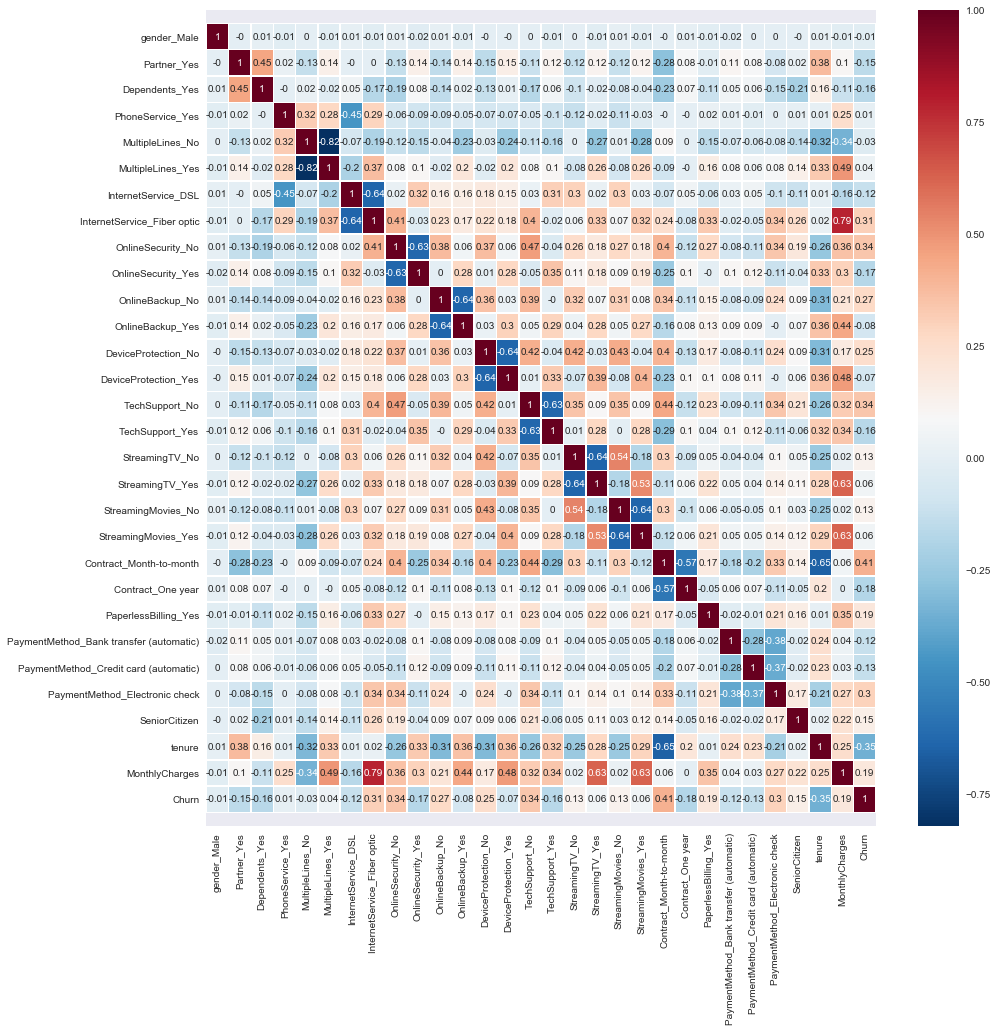

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Male                               -0.008612
MultipleLines_No                          -0.032569
DeviceProtec

In [0]:
pearson_corr = combined.corr(method="pearson")

pearson_corr = pearson_corr.round(2)

plt.subplots(figsize=(15, 15))

sns.heatmap(pearson_corr,
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

feature_correlation = combined[combined.columns[0:]].corr()['Churn'][:]
feature_correlation.sort_values(ascending=False)

# 4. Standardization and Principal Components Analysis (PCA)

In [0]:
X = combined.drop(columns=['Churn']).values
y = combined[['Churn']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5a. Logistic Regression Model

/Users/HoRenSen/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


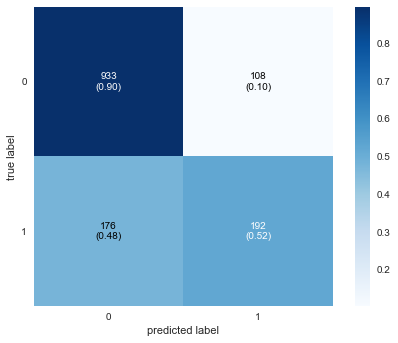

Accuracy :  0.7984386089425124
Precision:  0.64
Recall   :  0.5217391304347826
F1 Score :  0.5748502994011976
Accuracy: 0.7984386089425124
ROC AUC Score: 0.8248000459424467


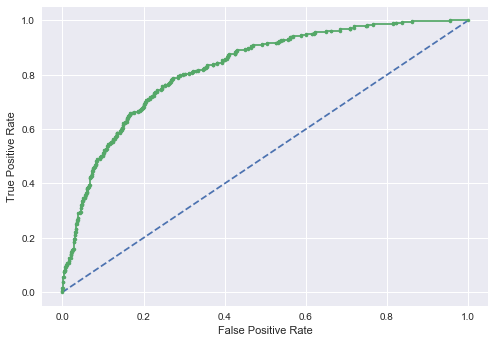

In [0]:
classifier_logistic = LogisticRegression(random_state = 0)
classifier_logistic.fit(X_train, y_train)

y_pred_logistic = classifier_logistic.predict(X_test)
y_pred_proba_logistic = classifier_logistic.predict_proba(X_test)

cm_logistic = confusion_matrix(y_test, y_pred_logistic)

fig, ax = plot_confusion_matrix(conf_mat=cm_logistic,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

tn, fp, fn, tp = cm_logistic.ravel()

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*precision*recall/(precision+recall)

print('Accuracy : ', accuracy)
print('Precision: ', precision)
print('Recall   : ', recall)
print('F1 Score : ', f1_score)

classification_evaluation(y_test, y_pred_proba_logistic[:,1])

# 5b. Deep Neural Network

Train on 4507 samples, validate on 1127 samples
Epoch 1/30
4507/4507 [==============================] - 0s 73us/step - loss: 0.4979 - accuracy: 0.7411 - val_loss: 0.4461 - val_accuracy: 0.7675
Epoch 2/30
4507/4507 [==============================] - 0s 37us/step - loss: 0.4593 - accuracy: 0.7681 - val_loss: 0.4322 - val_accuracy: 0.7782
Epoch 3/30
4507/4507 [==============================] - 0s 38us/step - loss: 0.4464 - accuracy: 0.7757 - val_loss: 0.4273 - val_accuracy: 0.7924
Epoch 4/30
4507/4507 [==============================] - 0s 38us/step - loss: 0.4386 - accuracy: 0.7843 - val_loss: 0.4231 - val_accuracy: 0.8004
Epoch 5/30
4507/4507 [==============================] - 0s 34us/step - loss: 0.4328 - accuracy: 0.7894 - val_loss: 0.4192 - val_accuracy: 0.8012
Epoch 6/30
4507/4507 [==============================] - 0s 34us/step - loss: 0.4280 - accuracy: 0.7903 - val_loss: 0.4158 - val_accuracy: 0.8048
Epoch 7/30
4507/4507 [==============================] - 0s 36us/step - loss: 0.424

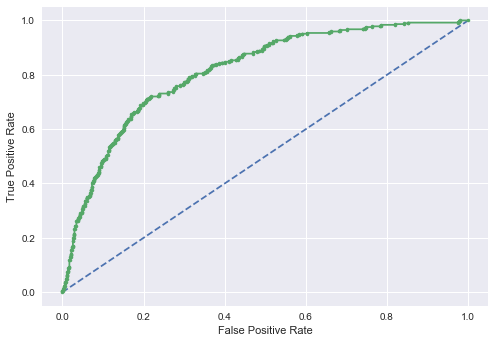

Train on 4507 samples, validate on 1127 samples
Epoch 1/30
4507/4507 [==============================] - 0s 61us/step - loss: 0.5713 - accuracy: 0.6814 - val_loss: 0.4609 - val_accuracy: 0.7799
Epoch 2/30
4507/4507 [==============================] - 0s 37us/step - loss: 0.4792 - accuracy: 0.7595 - val_loss: 0.4329 - val_accuracy: 0.8066
Epoch 3/30
4507/4507 [==============================] - 0s 34us/step - loss: 0.4564 - accuracy: 0.7788 - val_loss: 0.4213 - val_accuracy: 0.8172
Epoch 4/30
4507/4507 [==============================] - 0s 32us/step - loss: 0.4429 - accuracy: 0.7877 - val_loss: 0.4159 - val_accuracy: 0.8075
Epoch 5/30
4507/4507 [==============================] - 0s 32us/step - loss: 0.4345 - accuracy: 0.7919 - val_loss: 0.4131 - val_accuracy: 0.8004
Epoch 6/30
4507/4507 [==============================] - 0s 33us/step - loss: 0.4292 - accuracy: 0.7970 - val_loss: 0.4084 - val_accuracy: 0.8119
Epoch 7/30
4507/4507 [==============================] - 0s 35us/step - loss: 0.425

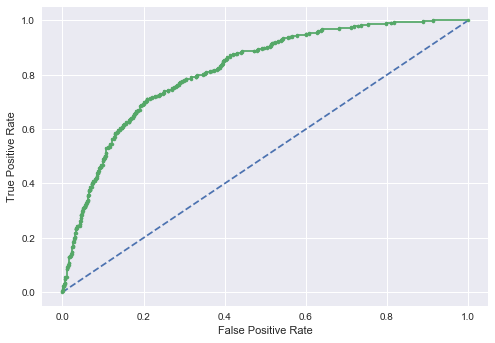

Train on 4507 samples, validate on 1127 samples
Epoch 1/30
4507/4507 [==============================] - 0s 69us/step - loss: 0.5735 - accuracy: 0.7071 - val_loss: 0.4604 - val_accuracy: 0.7711
Epoch 2/30
4507/4507 [==============================] - 0s 38us/step - loss: 0.4758 - accuracy: 0.7482 - val_loss: 0.4262 - val_accuracy: 0.7915
Epoch 3/30
4507/4507 [==============================] - 0s 38us/step - loss: 0.4496 - accuracy: 0.7790 - val_loss: 0.4162 - val_accuracy: 0.8030
Epoch 4/30
4507/4507 [==============================] - 0s 37us/step - loss: 0.4388 - accuracy: 0.7850 - val_loss: 0.4117 - val_accuracy: 0.8066
Epoch 5/30
4507/4507 [==============================] - 0s 36us/step - loss: 0.4333 - accuracy: 0.7859 - val_loss: 0.4114 - val_accuracy: 0.8075
Epoch 6/30
4507/4507 [==============================] - 0s 36us/step - loss: 0.4292 - accuracy: 0.7894 - val_loss: 0.4109 - val_accuracy: 0.8048
Epoch 7/30
4507/4507 [==============================] - 0s 34us/step - loss: 0.425

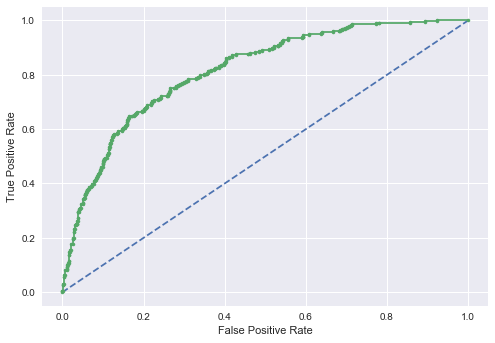

Train on 4507 samples, validate on 1127 samples
Epoch 1/30
4507/4507 [==============================] - 0s 67us/step - loss: 0.5681 - accuracy: 0.6967 - val_loss: 0.4552 - val_accuracy: 0.7693
Epoch 2/30
4507/4507 [==============================] - 0s 35us/step - loss: 0.4630 - accuracy: 0.7604 - val_loss: 0.4241 - val_accuracy: 0.8012
Epoch 3/30
4507/4507 [==============================] - 0s 35us/step - loss: 0.4438 - accuracy: 0.7837 - val_loss: 0.4147 - val_accuracy: 0.8128
Epoch 4/30
4507/4507 [==============================] - 0s 33us/step - loss: 0.4350 - accuracy: 0.7892 - val_loss: 0.4106 - val_accuracy: 0.8119
Epoch 5/30
4507/4507 [==============================] - 0s 35us/step - loss: 0.4295 - accuracy: 0.7932 - val_loss: 0.4080 - val_accuracy: 0.8057
Epoch 6/30
4507/4507 [==============================] - 0s 39us/step - loss: 0.4255 - accuracy: 0.7939 - val_loss: 0.4058 - val_accuracy: 0.8119
Epoch 7/30
4507/4507 [==============================] - 0s 36us/step - loss: 0.422

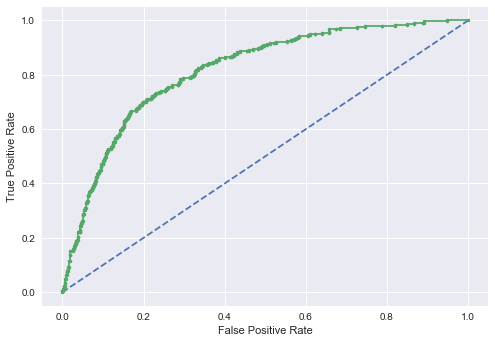

Train on 4507 samples, validate on 1127 samples
Epoch 1/30
4507/4507 [==============================] - 0s 54us/step - loss: 0.6319 - accuracy: 0.6492 - val_loss: 0.4502 - val_accuracy: 0.7764
Epoch 2/30
4507/4507 [==============================] - 0s 34us/step - loss: 0.4601 - accuracy: 0.7706 - val_loss: 0.4127 - val_accuracy: 0.7995
Epoch 3/30
4507/4507 [==============================] - 0s 33us/step - loss: 0.4387 - accuracy: 0.7890 - val_loss: 0.4058 - val_accuracy: 0.8110
Epoch 4/30
4507/4507 [==============================] - 0s 33us/step - loss: 0.4309 - accuracy: 0.7945 - val_loss: 0.4040 - val_accuracy: 0.8075
Epoch 5/30
4507/4507 [==============================] - 0s 32us/step - loss: 0.4265 - accuracy: 0.7943 - val_loss: 0.4033 - val_accuracy: 0.8110
Epoch 6/30
4507/4507 [==============================] - 0s 32us/step - loss: 0.4229 - accuracy: 0.7981 - val_loss: 0.4016 - val_accuracy: 0.8101
Epoch 7/30
4507/4507 [==============================] - 0s 32us/step - loss: 0.419

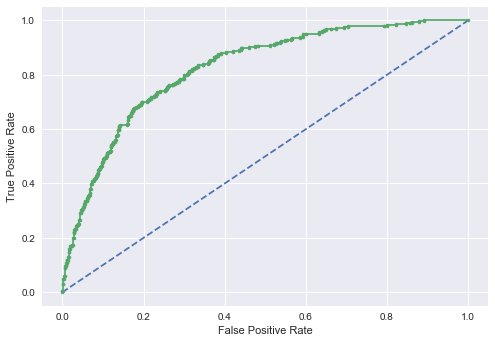

Train on 4507 samples, validate on 1127 samples
Epoch 1/30
4507/4507 [==============================] - 0s 54us/step - loss: 0.9162 - accuracy: 0.5019 - val_loss: 0.5540 - val_accuracy: 0.6930
Epoch 2/30
4507/4507 [==============================] - 0s 33us/step - loss: 0.5100 - accuracy: 0.7309 - val_loss: 0.4451 - val_accuracy: 0.7906
Epoch 3/30
4507/4507 [==============================] - 0s 31us/step - loss: 0.4605 - accuracy: 0.7719 - val_loss: 0.4261 - val_accuracy: 0.7995
Epoch 4/30
4507/4507 [==============================] - 0s 32us/step - loss: 0.4453 - accuracy: 0.7848 - val_loss: 0.4188 - val_accuracy: 0.8030
Epoch 5/30
4507/4507 [==============================] - 0s 31us/step - loss: 0.4373 - accuracy: 0.7892 - val_loss: 0.4147 - val_accuracy: 0.8119
Epoch 6/30
4507/4507 [==============================] - 0s 32us/step - loss: 0.4318 - accuracy: 0.7932 - val_loss: 0.4126 - val_accuracy: 0.8146
Epoch 7/30
4507/4507 [==============================] - 0s 33us/step - loss: 0.427

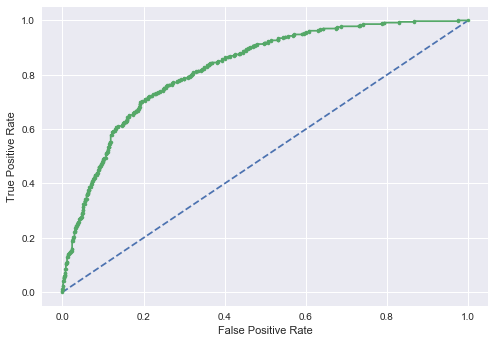

In [0]:
# Tuning number of layers and neurons for neural network.

# 1. 2 layers, 12 neurons in 1st layer, 6 neurons in 2nd layer
# 2. 2 layers, 12 neurons in 1st layer, 4 neurons in 2nd layer
# 3. 2 layers, 8 neurons in 1st layer, 6 neurons in 2nd layer
# 4. 2 layers, 8 neurons in 1st layer, 4 neurons in 2nd layer
# 5. 1 layer, 12 neurons
# 6. 1 layer, 8 neurons

y_train_nn = to_categorical(y_train)
n_cols = X_train.shape[1]
early_stopping_monitor = EarlyStopping(patience=3)

nn_model_2l_12n_6n = Sequential()
nn_model_2l_12n_6n.add(Dense(12, activation='relu', input_shape=(n_cols,)))
nn_model_2l_12n_6n.add(Dense(6, activation='relu'))
nn_model_2l_12n_6n.add(Dense(2, activation='softmax'))
nn_model_2l_12n_6n.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model_2l_12n_6n.fit(X_train, y_train_nn, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])
y_pred_proba_nn_model_2l_12n_6n = nn_model_2l_12n_6n.predict(X_test)
y_pred_nn_model_2l_12n_6n = np.argmax(y_pred_proba_nn_model_2l_12n_6n, axis=-1)
print("2 layers, 12 neurons in 1st layer, 6 neurons in 2nd layer")
classification_evaluation(y_test, y_pred_proba_nn_model_2l_12n_6n[:,1])

nn_model_2l_12n_4n = Sequential()
nn_model_2l_12n_4n.add(Dense(12, activation='relu', input_shape=(n_cols,)))
nn_model_2l_12n_4n.add(Dense(4, activation='relu'))
nn_model_2l_12n_4n.add(Dense(2, activation='softmax'))
nn_model_2l_12n_4n.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model_2l_12n_4n.fit(X_train, y_train_nn, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])
y_pred_proba_nn_model_2l_12n_4n = nn_model_2l_12n_4n.predict(X_test)
y_pred_nn_model_2l_12n_4n = np.argmax(y_pred_proba_nn_model_2l_12n_4n, axis=-1)
print("2 layers, 12 neurons in 1st layer, 4 neurons in 2nd layer")
classification_evaluation(y_test, y_pred_proba_nn_model_2l_12n_4n[:,1])

nn_model_2l_8n_6n = Sequential()
nn_model_2l_8n_6n.add(Dense(8, activation='relu', input_shape=(n_cols,)))
nn_model_2l_8n_6n.add(Dense(6, activation='relu'))
nn_model_2l_8n_6n.add(Dense(2, activation='softmax'))
nn_model_2l_8n_6n.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model_2l_8n_6n.fit(X_train, y_train_nn, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])
y_pred_proba_nn_model_2l_8n_6n = nn_model_2l_8n_6n.predict(X_test)
y_pred_nn_model_2l_8n_6n = np.argmax(y_pred_proba_nn_model_2l_8n_6n, axis=-1)
print("2 layers, 8 neurons in 1st layer, 6 neurons in 2nd layer")
classification_evaluation(y_test, y_pred_proba_nn_model_2l_8n_6n[:,1])

nn_model_2l_8n_4n = Sequential()
nn_model_2l_8n_4n.add(Dense(8, activation='relu', input_shape=(n_cols,)))
nn_model_2l_8n_4n.add(Dense(4, activation='relu'))
nn_model_2l_8n_4n.add(Dense(2, activation='softmax'))
nn_model_2l_8n_4n.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model_2l_8n_4n.fit(X_train, y_train_nn, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])
y_pred_proba_nn_model_2l_8n_4n = nn_model_2l_8n_4n.predict(X_test)
y_pred_nn_model_2l_8n_4n = np.argmax(y_pred_proba_nn_model_2l_8n_4n, axis=-1)
print("2 layers, 8 neurons in 1st layer, 4 neurons in 2nd layer")
classification_evaluation(y_test, y_pred_proba_nn_model_2l_8n_4n[:,1])

nn_model_1l_12n = Sequential()
nn_model_1l_12n.add(Dense(12, activation='relu', input_shape=(n_cols,)))
nn_model_1l_12n.add(Dense(2, activation='softmax'))
nn_model_1l_12n.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model_1l_12n.fit(X_train, y_train_nn, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])
y_pred_proba_nn_model_1l_12n = nn_model_1l_12n.predict(X_test)
y_pred_nn_model_1l_12n = np.argmax(y_pred_proba_nn_model_1l_12n, axis=-1)
print("1 layer, 12 neurons")
classification_evaluation(y_test, y_pred_proba_nn_model_1l_12n[:,1])

nn_model_1l_8n = Sequential()
nn_model_1l_8n.add(Dense(8, activation='relu', input_shape=(n_cols,)))
nn_model_1l_8n.add(Dense(2, activation='softmax'))
nn_model_1l_8n.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model_1l_8n.fit(X_train, y_train_nn, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])
y_pred_proba_nn_model_1l_8n = nn_model_1l_8n.predict(X_test)
y_pred_nn_model_1l_8n = np.argmax(y_pred_proba_nn_model_1l_8n, axis=-1)
print("1 layer, 8 neurons")
classification_evaluation(y_test, y_pred_proba_nn_model_1l_8n[:,1])

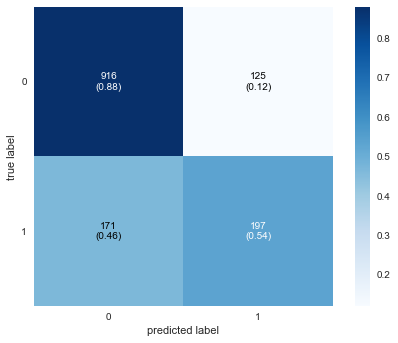

Accuracy :  0.7899219304471257
Precision:  0.6118012422360248
Recall   :  0.5353260869565217
F1 Score :  0.5710144927536231
Accuracy: 0.7899219304471257
ROC AUC Score: 0.8234087207116902


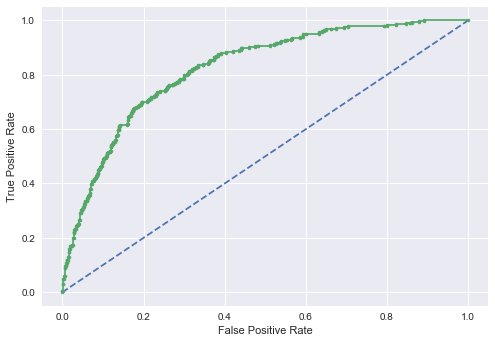

In [0]:
cm_nn = confusion_matrix(y_test, y_pred_nn_model_1l_12n)

fig, ax = plot_confusion_matrix(conf_mat=cm_nn,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

tn_nn, fp_nn, fn_nn, tp_nn = cm_nn.ravel()

accuracy = (tp_nn+tn_nn)/(tp_nn+tn_nn+fp_nn+fn_nn)
precision = tp_nn/(tp_nn+fp_nn)
recall = tp_nn/(tp_nn+fn_nn)
f1_score = 2*precision*recall/(precision+recall)

print('Accuracy : ', accuracy)
print('Precision: ', precision)
print('Recall   : ', recall)
print('F1 Score : ', f1_score)
classification_evaluation(y_test, y_pred_proba_nn_model_1l_12n[:,1])

# 5c. Random Forest

/Users/HoRenSen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.772888573456352
ROC AUC Score: 0.7962413335839286


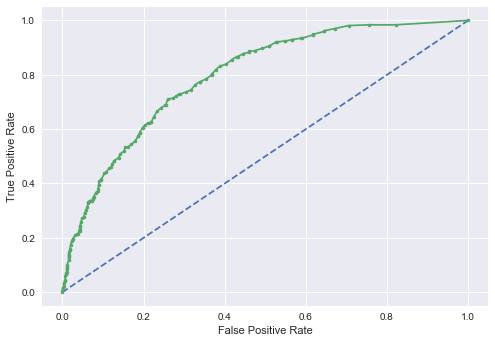

/Users/HoRenSen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy: 0.7693399574166075
ROC AUC Score: 0.7968038675186901


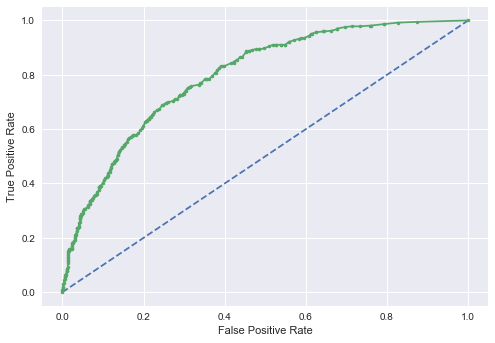

/Users/HoRenSen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Accuracy: 0.7721788502484032
ROC AUC Score: 0.7944467067618929


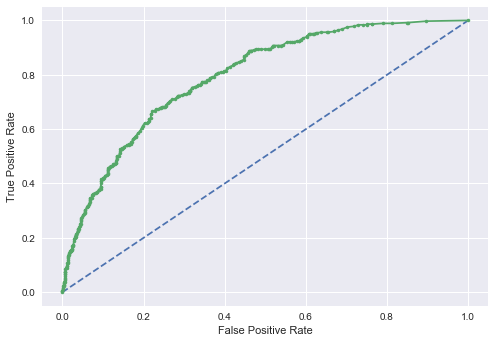

/Users/HoRenSen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.7686302342086586
ROC AUC Score: 0.7966550766403542


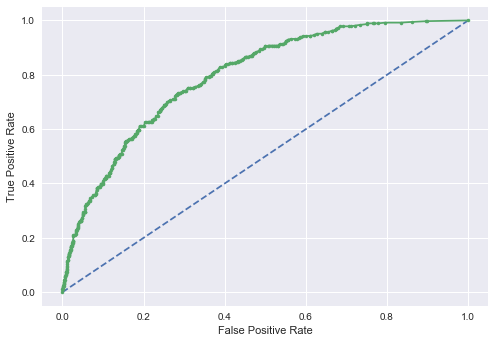

/Users/HoRenSen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.7700496806245565
ROC AUC Score: 0.795041870275237


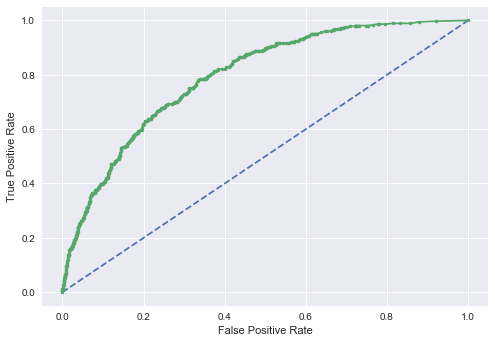

In [0]:
rf_model_100t = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')
rf_model_100t.fit(X_train, y_train)
y_pred_proba_rf_100t = rf_model_100t.predict_proba(X_test)
classification_evaluation(y_test, y_pred_proba_rf_100t[:,1])

rf_model_200t = RandomForestClassifier(n_estimators=200, bootstrap=True, max_features='sqrt')
rf_model_200t.fit(X_train, y_train)
y_pred_proba_rf_200t = rf_model_200t.predict_proba(X_test)
classification_evaluation(y_test, y_pred_proba_rf_200t[:,1])

rf_model_300t = RandomForestClassifier(n_estimators=300, bootstrap=True, max_features='sqrt')
rf_model_300t.fit(X_train, y_train)
y_pred_proba_rf_300t = rf_model_300t.predict_proba(X_test)
classification_evaluation(y_test, y_pred_proba_rf_300t[:,1])

rf_model_400t = RandomForestClassifier(n_estimators=400, bootstrap=True, max_features='sqrt')
rf_model_400t.fit(X_train, y_train)
y_pred_proba_rf_400t = rf_model_400t.predict_proba(X_test)
classification_evaluation(y_test, y_pred_proba_rf_400t[:,1])

rf_model_500t = RandomForestClassifier(n_estimators=500, bootstrap=True, max_features='sqrt')
rf_model_500t.fit(X_train, y_train)
y_pred_proba_rf_500t = rf_model_500t.predict_proba(X_test)
classification_evaluation(y_test, y_pred_proba_rf_500t[:,1])

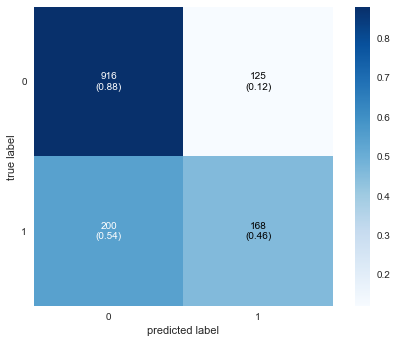

Accuracy :  0.7693399574166075
Precision:  0.5733788395904437
Recall   :  0.45652173913043476
F1 Score :  0.5083207261724659
Accuracy: 0.7693399574166075
ROC AUC Score: 0.7968038675186901


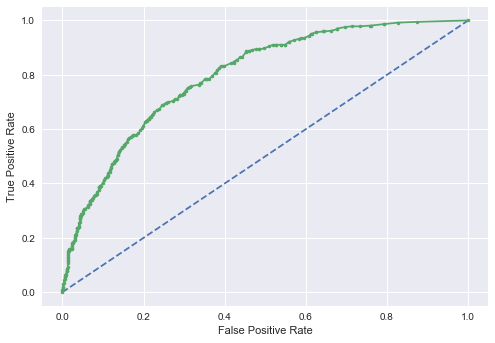

In [0]:
y_pred_rf_200t = rf_model_200t.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf_200t)

fig, ax = plot_confusion_matrix(conf_mat=cm_rf,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

tn_nn, fp_nn, fn_nn, tp_nn = cm_rf.ravel()

accuracy = (tp_nn+tn_nn)/(tp_nn+tn_nn+fp_nn+fn_nn)
precision = tp_nn/(tp_nn+fp_nn)
recall = tp_nn/(tp_nn+fn_nn)
f1_score = 2*precision*recall/(precision+recall)

print('Accuracy : ', accuracy)
print('Precision: ', precision)
print('Recall   : ', recall)
print('F1 Score : ', f1_score)
classification_evaluation(y_test, y_pred_proba_rf_200t[:,1])

# 5d. Decision Tree

max depth = 3, criterion = gini
Accuracy: 0.7785663591199432
ROC AUC Score: 0.7946555360648206


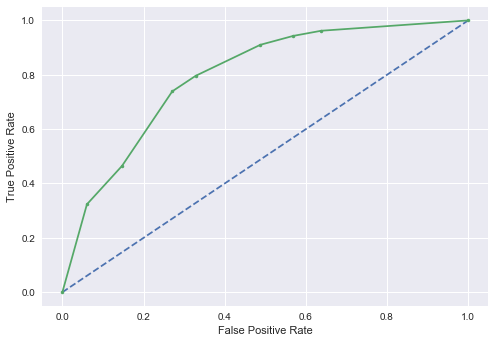

max depth = 5, criterion = gini
Accuracy: 0.7856635911994322
ROC AUC Score: 0.8117286367623106


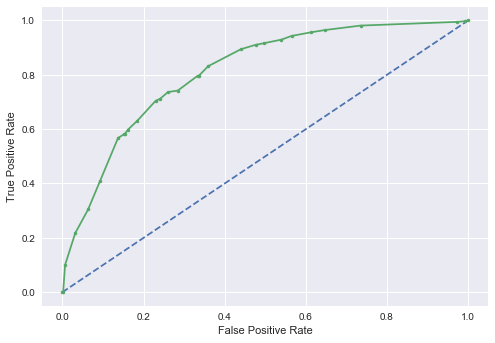

max depth = 8, criterion = gini
Accuracy: 0.7799858055358411
ROC AUC Score: 0.7844633608988014


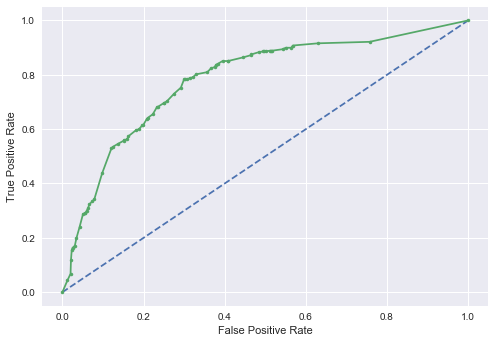

max depth = 3, criterion = entropy
Accuracy: 0.7785663591199432
ROC AUC Score: 0.7946555360648206


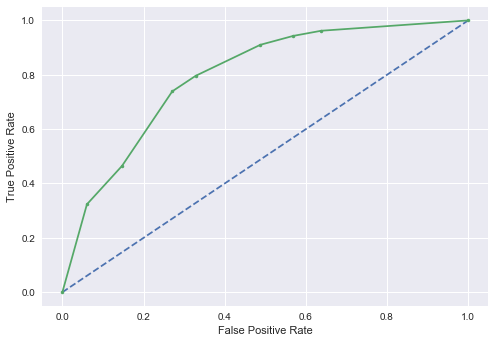

max depth = 5, criterion = entropy
Accuracy: 0.7849538679914834
ROC AUC Score: 0.8104038758718624


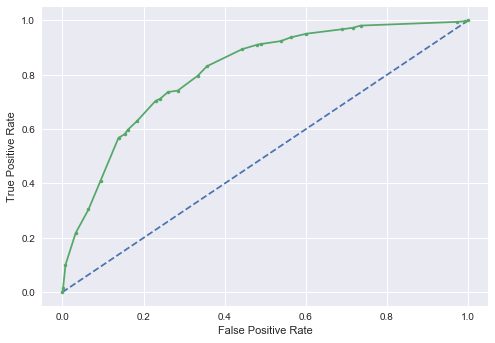

max depth = 8, criterion = entropy
Accuracy: 0.7778566359119943
ROC AUC Score: 0.7861457419705133


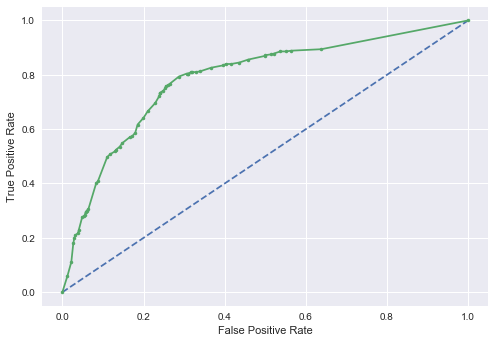

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#Compare with different criterion, depth
#max_depth = 3, splitter  = "best", criterion = "gini"
dt_model_gini_3 = DecisionTreeClassifier(max_depth = 3, splitter  = "best", criterion = "gini")
dt_model_gini_3.fit(X_train, y_train)
y_pred_gini_3 = dt_model_gini_3.predict(X_test)
y_pred_proba_gini_3 = dt_model_gini_3.predict_proba(X_test)
print("max depth = 3, criterion = gini")
classification_evaluation(y_test, y_pred_proba_gini_3[:,1])
#tree.plot_tree(dt_model_gini_3)

#max_depth = 5, splitter  = "best", criterion = "gini"
dt_model_gini_5 = DecisionTreeClassifier(max_depth = 5, splitter  = "best", criterion = "gini")
dt_model_gini_5.fit(X_train, y_train)
y_pred_gini_5 = dt_model_gini_5.predict(X_test)
y_pred_proba_gini_5 = dt_model_gini_5.predict_proba(X_test)
print("max depth = 5, criterion = gini")
classification_evaluation(y_test, y_pred_proba_gini_5[:,1])

#max_depth = 8, splitter  = "best", criterion = "gini"
dt_model_gini_8 = DecisionTreeClassifier(max_depth = 8, splitter  = "best", criterion = "gini")
dt_model_gini_8.fit(X_train, y_train)
y_pred_gini_8 = dt_model_gini_8.predict(X_test)
y_pred_proba_gini_8 = dt_model_gini_8.predict_proba(X_test)
print("max depth = 8, criterion = gini")
classification_evaluation(y_test, y_pred_proba_gini_8[:,1])

#max_depth = 3, splitter  = "best", criterion = "entropy"
dt_model_entropy_3 = DecisionTreeClassifier(max_depth = 3, splitter  = "best", criterion = "entropy")
dt_model_entropy_3.fit(X_train, y_train)
y_pred_entropy_3 = dt_model_entropy_3.predict(X_test)
y_pred_proba_entropy_3 = dt_model_entropy_3.predict_proba(X_test)
print("max depth = 3, criterion = entropy")
classification_evaluation(y_test, y_pred_proba_entropy_3[:,1])
#tree.plot_tree(dt_model_entropy)

#max_depth = 5, splitter  = "best", criterion = "entropy"
dt_model_entropy_5 = DecisionTreeClassifier(max_depth = 5, splitter  = "best", criterion = "entropy")
dt_model_entropy_5.fit(X_train, y_train)
y_pred_entropy_5 = dt_model_entropy_5.predict(X_test)
y_pred_proba_entropy_5 = dt_model_entropy_5.predict_proba(X_test)
print("max depth = 5, criterion = entropy")
classification_evaluation(y_test, y_pred_proba_entropy_5[:,1])


#max_depth = 8, splitter  = "best", criterion = "entropy"
dt_model_entropy_8 = DecisionTreeClassifier(max_depth = 8, splitter  = "best", criterion = "entropy")
dt_model_entropy_8.fit(X_train, y_train)
y_pred_entropy_8 = dt_model_entropy_8.predict(X_test)
y_pred_proba_entropy_8 = dt_model_entropy_8.predict_proba(X_test)
print("max depth = 8, criterion = entropy")
classification_evaluation(y_test, y_pred_proba_entropy_8[:,1])

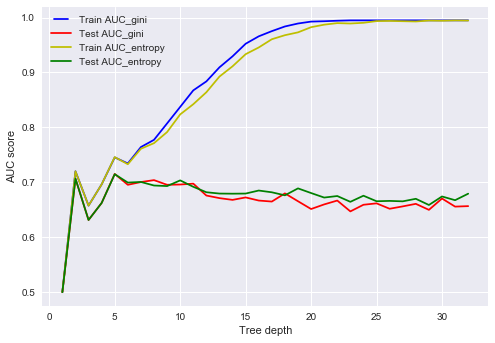

In [0]:
#Study the hyperparameter for max_depth
#For both criteron gini and entropy, performance are similar, with the tree depth increases
#the performance is also improved, but it will lead to overfitting when the depth is too bi
from sklearn.metrics import roc_curve, auc, roc_auc_score
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results_gini = []
train_results_entropy = []
test_results_gini = []
test_results_entropy = []
for max_depth in max_depths:
   dt_gini = DecisionTreeClassifier(max_depth=max_depth,criterion = "gini")
   dt_gini.fit(X_train, y_train)   
   dt_entropy = DecisionTreeClassifier(max_depth=max_depth,criterion = "entropy")
   dt_entropy.fit(X_train, y_train) 
   train_pred_gini = dt_gini.predict(X_train)
   train_pred_entropy = dt_entropy.predict(X_train)   

   false_positive_rate, true_positive_rate, thresholds_gini = roc_curve(y_train, train_pred_gini)
   roc_auc_gini = auc(false_positive_rate, true_positive_rate)
   train_results_gini.append(roc_auc_gini)

   false_positive_rate, true_positive_rate, thresholds_entropy = roc_curve(y_train, train_pred_entropy)
   roc_auc_entropy = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results_entropy.append(roc_auc_entropy)      

   y_pred_gini = dt_gini.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_gini)
   roc_auc_gini = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results_gini.append(roc_auc_gini)

   y_pred_entropy = dt_entropy.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_entropy)
   roc_auc_entropy = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results_entropy.append(roc_auc_entropy)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_gini, 'b', label="Train AUC_gini")
line2, = plt.plot(max_depths, test_results_gini, 'r', label="Test AUC_gini")
line3, = plt.plot(max_depths, train_results_entropy, 'y', label="Train AUC_entropy")
line4, = plt.plot(max_depths, test_results_entropy, 'g', label="Test AUC_entropy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

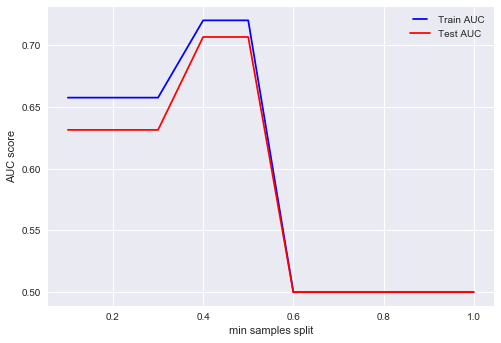

In [0]:
#Study the hyper parameter for samples_splits
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)   
   train_pred = dt.predict(X_train)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   y_pred = dt.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

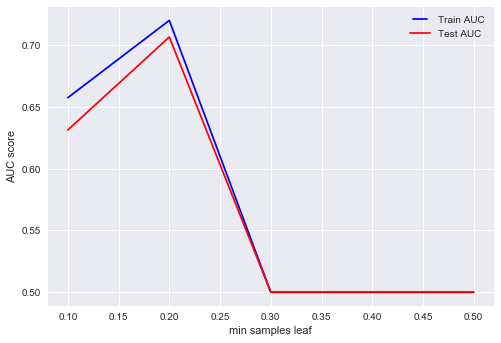

In [0]:
#Study the hyperparameter for samples_leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)   
   train_pred = dt.predict(X_train)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   y_pred = dt.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.7764371894960965
ROC AUC Score: 0.7831359896420667


[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.9s finished


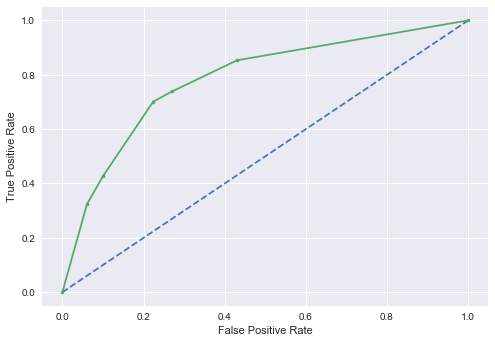

In [0]:
# Grid search to get the hyperparameter_the best possible parameters for DT
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

dt_model_best = grid_search_cv.best_estimator_

#below is the model get by gridsearchcv
#dt_model_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
#                       max_depth=None, max_features=None, max_leaf_nodes=6,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, presort='deprecated',
#                       random_state=42, splitter='best')

dt_model_best.fit(X_train, y_train)
y_pred_best = dt_model_best.predict(X_test)
y_pred_proba_best= dt_model_best.predict_proba(X_test)
classification_evaluation(y_test, y_pred_proba_best[:,1])

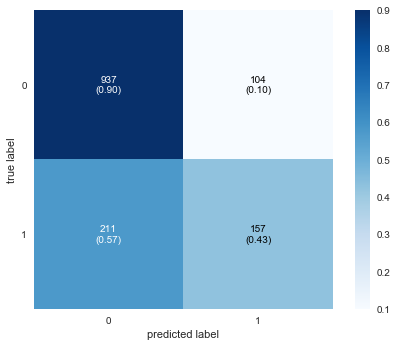

Accuracy :  0.7764371894960965
Precision:  0.6015325670498084
Recall   :  0.4266304347826087
F1 Score :  0.4992050874403816
Accuracy: 0.7764371894960965
ROC AUC Score: 0.7831359896420667


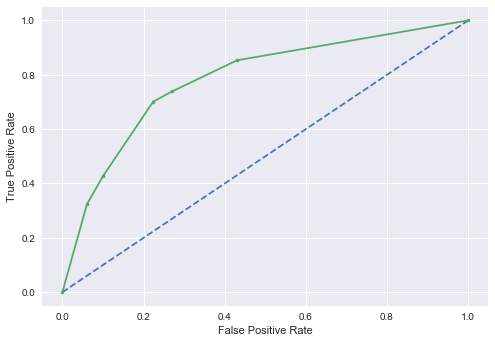

In [0]:
y_pred_best = dt_model_best.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_best)

fig, ax = plot_confusion_matrix(conf_mat=cm_dt,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

tn_nn, fp_nn, fn_nn, tp_nn = cm_dt.ravel()

accuracy = (tp_nn+tn_nn)/(tp_nn+tn_nn+fp_nn+fn_nn)
precision = tp_nn/(tp_nn+fp_nn)
recall = tp_nn/(tp_nn+fn_nn)
f1_score = 2*precision*recall/(precision+recall)

print('Accuracy : ', accuracy)
print('Precision: ', precision)
print('Recall   : ', recall)
print('F1 Score : ', f1_score)

classification_evaluation(y_test, y_pred_proba_best[:,1])

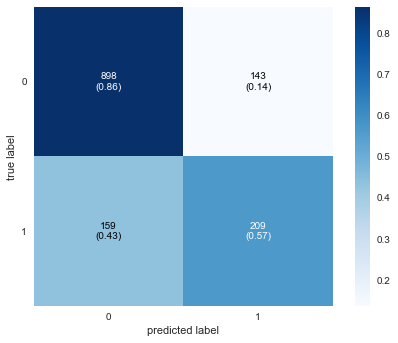

Accuracy :  0.7856635911994322
Precision:  0.59375
Recall   :  0.5679347826086957
F1 Score :  0.5805555555555556
Accuracy: 0.7856635911994322
ROC AUC Score: 0.8117286367623106


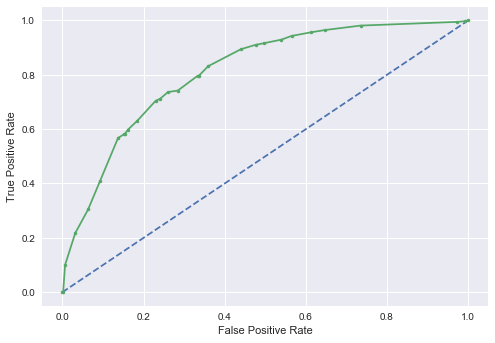

In [0]:
y_pred_gini_5 = dt_model_gini_5.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_gini_5)

fig, ax = plot_confusion_matrix(conf_mat=cm_dt,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

tn_nn, fp_nn, fn_nn, tp_nn = cm_dt.ravel()

accuracy = (tp_nn+tn_nn)/(tp_nn+tn_nn+fp_nn+fn_nn)
precision = tp_nn/(tp_nn+fp_nn)
recall = tp_nn/(tp_nn+fn_nn)
f1_score = 2*precision*recall/(precision+recall)

print('Accuracy : ', accuracy)
print('Precision: ', precision)
print('Recall   : ', recall)
print('F1 Score : ', f1_score)

classification_evaluation(y_test, y_pred_proba_gini_5[:,1])

In [0]:
# XGBoost (for PCA)

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# fit model on training data
max_depth_options = [2, 3, 4, 5, 6, 7, 8]
colsample_bytree_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# print("max_depth | colsample_bytree | Accuracy | ROC")

# for x in max_depth_options:
#     for y in colsample_bytree_options:
model = XGBClassifier(max_depth=8, 
                      colsample_bytree=0.6,
                      silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      gamma=10)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
xg_boost_accuracy = accuracy_score(y_test, predictions)
xg_boost_precision = precision_score(y_test, predictions)
xg_boost_recall = recall_score(y_test, predictions)
xg_boost_f1 = f1_score(y_test, predictions)
xg_boost_roc = roc_auc_score(y_test, predictions)


#         print(str(x) + "         | " + str(y) + "              | " + str(round(xg_boost_accuracy,3)) + "    | " + str(round(xg_boost_roc,3)))
print("Accuracy  : " + str(xg_boost_accuracy))
print("Precision : " + str(xg_boost_precision))
print("Recall    : " + str(xg_boost_recall))
print("F1        : " + str(xg_boost_f1))
print("ROC       : " + str(xg_boost_roc))


max_depth | colsample_bytree | Accuracy | ROC
Accuracy  : 0.7991483321504613
Precision : 0.6501766784452296
Recall    : 0.5
F1        : 0.565284178187404
ROC       : 0.702449567723343
